In [1]:
%matplotlib inline
import sys
sys.path.append("../lib/")
import os
import string
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.tree import plot_tree
import seaborn as sns
import graphviz
import shap

from raman_lib.visualization import (plot_spectra_peaks, 
                                     plot_qc_summary, 
                                     plot_confidence_scores, 
                                     plot_coefs, 
                                     plot_confusion_matrix, 
                                     plot_roc_curve, 
                                     plot_validation_curve,
                                     plot_roc_comparison,
                                     boxplot_comparison)

In [3]:
#dataset = "pro"
dataset = "L_540_2022_C_E_R_B"

In [4]:
results_path = Path("../results/") / dataset
img_path = Path("../img/") / dataset

img_path.mkdir(parents=True, exist_ok=True)

In [5]:
data = pd.read_csv(results_path / (dataset + "_preprocessed.csv"))

y, y_key = pd.factorize(data.label)

In [6]:
rocs = {}
aucs = {}
p_vals = {}
accs = {}
f1_scores = {}
fit_times = {}
predict_times = {}

In [7]:
plt.style.use("seaborn-paper")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["figure.dpi"] = 100

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 11
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 9

In [8]:
### inspect results more methods

In [10]:
current_path = results_path / "MLP/"
name = "MLP"

ct_df = pd.read_csv(current_path / "ct_results.csv")

accs[name] = ct_df.test_accuracy
#f1_scores[name] = ct_df.test_f1
fit_times[name] = ct_df.fit_time
predict_times[name] = ct_df.predict_time
p_vals[name] = ct_df.p_value

ct_df.describe()

,train_accuracy,test_accuracy,fit_time,predict_time,p_value
count,3.000000,3.000000,3.000000,3.000000,3.000000e+00
mean,0.936389,0.635278,38.181086,0.015310,9.301777e-70
std,0.013878,0.005549,1.548628,0.000666,1.248942e-69
min,0.920833,0.631667,36.396663,0.014626,6.698676e-71
25%,0.930833,0.632083,37.684665,0.014987,2.141218e-70
50%,0.940833,0.632500,38.972666,0.015349,3.612569e-70
75%,0.944167,0.637083,39.073297,0.015653,1.361773e-69
max,0.947500,0.641667,39.173929,0.015957,2.362289e-69


In [12]:
cv_df = pd.read_csv(current_path / "cv_results.csv")
param_df = pd.read_csv(current_path / "param_results.csv")
proba_df = pd.read_csv(current_path / "probabilities.csv", header=None)
pred_df = pd.read_csv(current_path / "predictions.csv", header=None)

NameError: name 'shap_val_df' is not defined

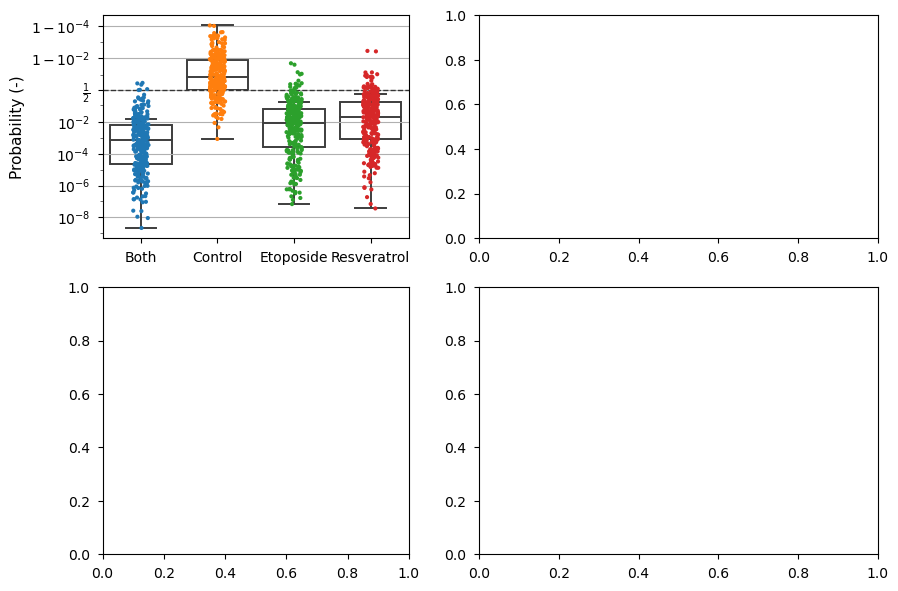

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2,
                        gridspec_kw={"width_ratios": (1, 1.3), 
                                     "height_ratios": (1, 1.2)})

ax1 = axs[0,0]
plot_confidence_scores(proba_df, y_key[y], y_key, markersize=3, ax=ax1)
ax1.axhline(0.5, color="k", linestyle="--", linewidth=1, alpha=0.7)
ax1.set_yscale("logit")
ax1.set_ylabel("Probability (-)")
ax1.grid(axis="y")

ax2 = axs[0,1]
plot_coefs(shap_val_df, ax=ax2, col=False, annotate=True, annot_kw={"min_height": 0.25, 
                                                                    "min_dist": 50,
                                                                    "offset": 6,
                                                                    "fontsize": 9})

ax2.set_xlabel("Wavenumber ($\mathregular{cm^{-1}}$)")
ax2.set_ylabel("Mean absolute SHAP value")
ax2.margins(x=0, y=0.2)
ax2.set_ylim(0, None)
ax2.grid()

ax3 = axs[1,0]
plot_confusion_matrix(pred_df, y, labels=y_key, ax=ax3, cmap="Greys", colorbar=True, aspect="auto")


ax4 = axs[1,1]
rocs[name], aucs[name] = plot_roc_curve(proba_df, y, name, ax=ax4)
ax4.set_xlabel(f"False Positive Rate")
ax4.set_ylabel(f"True Positive Rate")
ax4.legend(loc="lower right")
ax4.grid()

for i, ax in enumerate(axs.ravel()):
    ax.text(-0.05, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=16, weight="bold")

fig.subplots_adjust(wspace=0.35, hspace=0.3)
fig.align_xlabels()
fig.align_ylabels(axs=[ax1, ax3])

fig.savefig(img_path / "gbdt_combined.png", format="png", dpi=300, bbox_inches="tight")